Beschrijving van de dataset

Deze dataset is kunstmatig gecreëerd en richt zich op het voorspellen van landbouwoogsten. Het simuleert omstandigheden op basis van diverse milieu- en managementfactoren. Het doel is het bieden van een oefenomgeving voor het ontwikkelen van voorspellende modellen in de context van landbouw, machine learning en regressieanalyse.

Dit Python-script maakt gebruik van de pandas-bibliotheek om de gegevens in te lezen vanuit het CSV-bestand genaamd "agricultural_yield_train.csv". De gegevens worden opgeslagen in de variabele `ay_data`. Door de `head()`-functie te gebruiken, worden de eerste paar rijen van de dataset weergegeven. Dit geeft een snel overzicht van de structuur en inhoud van de gegevens.

In [1]:
import pandas as pd

ay_data = pd.read_csv("../csv/agricultural_yield_train.csv")
ay_data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,96.415657,1,147.853040,94.593926,444.267569,3,683.759119
1,92.352626,0,281.565396,90.504644,517.585491,7,678.714861
2,63.714785,1,137.864940,97.329340,420.310945,8,934.691975
3,90.084256,1,100.946659,113.404828,547.817646,7,905.842541
4,81.600341,1,223.088908,83.048176,434.726333,6,897.584665


Dit Python-script bereidt gegevens voor machine learning voor door features (`X`) en een targetvariabele (`y`) te definiëren. De features worden gedefinieerd als alle kolommen behalve `"Seed_Variety"` in het DataFrame `ay_data`, en de targetvariabele (`y`) wordt ingesteld op de kolom `"Seed_Variety"`.

In [2]:
X = ay_data.drop(["Seed_Variety"], axis=1)
y = ay_data["Seed_Variety"]

X, y

(       Soil_Quality  Fertilizer_Amount_kg_per_hectare  Sunny_Days  \
 0         96.415657                        147.853040   94.593926   
 1         92.352626                        281.565396   90.504644   
 2         63.714785                        137.864940   97.329340   
 3         90.084256                        100.946659  113.404828   
 4         81.600341                        223.088908   83.048176   
 ...             ...                               ...         ...   
 15995     77.053550                        154.189768  103.115855   
 15996     99.795631                        282.295839  123.598354   
 15997     67.478487                        120.017122  102.308627   
 15998     85.176890                        247.847389  114.956634   
 15999     87.838280                        244.216536   98.313738   
 
        Rainfall_mm  Irrigation_Schedule  Yield_kg_per_hectare  
 0       444.267569                    3            683.759119  
 1       517.585491         

Dit Python-script maakt gebruik van de `train_test_split`-functie uit de scikit-learn bibliotheek om een dataset op te splitsen in training- en testsets. De features (`X`) en de bijbehorende targetvariabele (`y`) worden als invoer gegeven. De resulterende datasets, `X_train`, `X_test`, `y_train`, en `y_test`, worden gebruikt voor het trainen en evalueren van de modellen. De parameter `test_size=0.2` geeft aan dat 20% van de gegevens wordt toegewezen aan de testset, terwijl 80% wordt gebruikt voor training. De parameter `random_state=0` zorgt voor reproduceerbaarheid van de splitsing. Met toevoeging van `stratify=y` wordt de parameter `stratify` toegepast, wat betekent dat de verdeling van klassen in de targetvariabele (`y`) behouden blijft in zowel de training- als de testset. Dit is vooral relevant bij classificatietaken met ongebalanceerde datasets, waarbij het behoud van dezelfde klasseverdeling in beide sets belangrijk is om de representativiteit van de data te waarborgen.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Dit codeblok voert een grid search uit om de optimale hyperparameters te vinden voor een Support Vector Machine (SVM) classifier. De parameter grid omvat verschillende waarden voor de reguliseringsparameter C en de kernelopties (lineair, polynomiaal, RBF en sigmoid). Vervolgens wordt een GridSearchCV-object geïnitialiseerd met de SVM-classifier als estimator en het parameter grid. De grid search wordt uitgevoerd met 5-voudige cross-validatie. Na het uitvoeren van de grid search worden de beste gevonden hyperparameters en het resulterende beste SVM-model opgeslagen in respectievelijk `best_params_svm` en `best_model_svm`.

**DIT CODE BLOK RUNT DE EERSTE KEER 5 MIN**

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

model_svm = SVC()

grid_search_svm = GridSearchCV(estimator=model_svm, param_grid=param_grid, cv=5)

grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_

best_model_svm = grid_search_svm.best_estimator_

Deze code lijn maakt gebruik van het eerder getrainde beslissingsboomclassificatiemodel (`best_model_svm`) om voorspellingen te doen op de testdataset (`X_test`). De voorspellingen worden opgeslagen in de variabele `y_pred_svm`. Het doel is om de prestaties van het model te evalueren door de voorspellingen te vergelijken met de echte labels van de testdataset.

In [5]:
y_pred_svm = best_model_svm.predict(X_test)
y_pred_svm

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

Dit codeblok voert een iteratieve evaluatie uit van de nauwkeurigheid van Support Vector Machine (SVM)-modellen voor verschillende combinaties van hyperparameters. Het doorloopt alle mogelijke combinaties van de parameter `C` en `kernel` en berekent de nauwkeurigheid van elk model op de testset. Vervolgens wordt het beste model geïdentificeerd op basis van de hoogste nauwkeurigheid en worden de beste hyperparameters en de bijbehorende nauwkeurigheid weergegeven.

In [6]:
from sklearn.metrics import accuracy_score

for C_value in param_grid['C']:
    for kernel_value in param_grid['kernel']:
        svm_classifier = SVC(C=C_value, kernel=kernel_value)
        svm_classifier.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, svm_classifier.predict(X_test))
        print(f"Accuracy for C={C_value}, kernel={kernel_value}: {accuracy}")

best_accuracy_svm = accuracy_score(y_test, best_model_svm.predict(X_test))
print("----------------------------------------------------------------------")
print(f"Best hyperparameters for Support Vector Machine: {best_params_svm}")
print(f"Accuracy of best Support Vector Machine model: {best_accuracy_svm}")

Accuracy for C=0.1, kernel=linear: 0.9978125
Accuracy for C=0.1, kernel=poly: 0.914375
Accuracy for C=0.1, kernel=rbf: 0.9090625
Accuracy for C=0.1, kernel=sigmoid: 0.4625
Accuracy for C=1, kernel=linear: 0.998125
Accuracy for C=1, kernel=poly: 0.9434375
Accuracy for C=1, kernel=rbf: 0.9190625
Accuracy for C=1, kernel=sigmoid: 0.435
Accuracy for C=10, kernel=linear: 0.9975
Accuracy for C=10, kernel=poly: 0.994375
Accuracy for C=10, kernel=rbf: 0.966875
Accuracy for C=10, kernel=sigmoid: 0.4334375
Accuracy for C=100, kernel=linear: 0.9978125
Accuracy for C=100, kernel=poly: 0.9971875
Accuracy for C=100, kernel=rbf: 0.99625
Accuracy for C=100, kernel=sigmoid: 0.433125
----------------------------------------------------------------------
Best hyperparameters for Support Vector Machine: {'C': 1, 'kernel': 'linear'}
Accuracy of best Support Vector Machine model: 0.998125


Dit codeblok genereert een scatterplot die de trainingsdata punten visualiseert, waarbij de kleur van elk punt overeenkomt met de bijbehorende klasse. Daarnaast worden de ondersteuningsvectoren van het SVM-model aangeduid met een kruisvormig symbool. Dit helpt bij het visualiseren van hoe de SVM de data punten classificeert en welke punten bijdragen aan het bepalen van de scheidingsvlakken tussen de klassen.

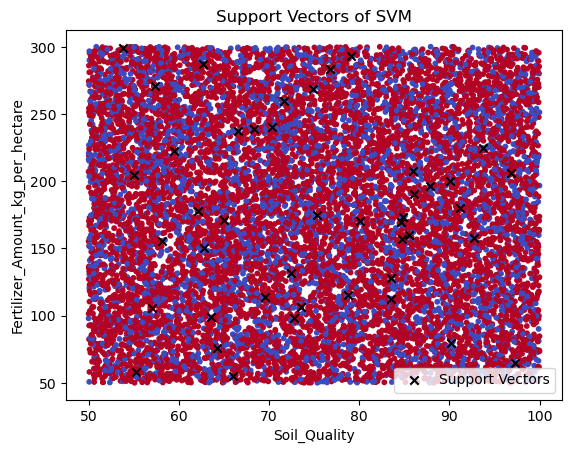

In [10]:
import matplotlib.pyplot as plt

support_vectors = best_model_svm.support_vectors_

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='coolwarm', s=10)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='k', marker='x', label='Support Vectors')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.title('Support Vectors of SVM')
plt.show()


Conclusie

Deze code voert een grid search uit voor het fine-tunen van hyperparameters van een Support Vector Machine (SVM) model voor het voorspellen van het zaadvariëteit op basis van kenmerken van de bodemkwaliteit, gebruikte kunstmesthoeveelheid, aantal zonnige dagen, neerslag en irrigatieschema. Het doel is om het model te optimaliseren voor maximale voorspellende nauwkeurigheid.

De resultaten van het grid search-proces tonen aan dat het SVM-model de beste prestaties behaalt met een lineaire kernel en een kostparameter (C) van 1, met een nauwkeurigheid van ongeveer 99.81% op de testdataset. Opmerkelijk is dat de prestaties van het model significant variëren afhankelijk van de keuze van de kernel en de waarde van de kostparameter. 

De hoge nauwkeurigheid van het SVM-model, vooral met een lineaire kernel, suggereert dat er een duidelijk lineair verband bestaat tussen de kenmerken en de zaadvariëteit. Dit kan aangeven dat de voorspelling van het zaadvariëteit goed wordt bepaald door de individuele kenmerken van de bodemkwaliteit, kunstmestgebruik, weersomstandigheden en irrigatieschema. 

Bovendien, gezien de hoge nauwkeurigheid van het model, zou dit SVM-model potentieel kunnen hebben voor praktische toepassingen in de landbouwsector, waarbij het kan helpen bij het identificeren van optimale zaadvariëteiten op basis van bodem- en weersomstandigheden, wat uiteindelijk kan bijdragen aan een verbeterde gewasopbrengst en landbouwproductiviteit.